# 1. Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os

# 2. Remove dodgy images

In [2]:
import cv2
import imghdr

C:\Users\DELL\AppData\Local\Temp\ipykernel_16324\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [3]:
data_dir = os.path.join('data1',"train") 

In [4]:
os.listdir(data_dir)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):  #['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    for image in os.listdir(os.path.join(data_dir, image_class)):  #picks photo from each folder
        image_path = os.path.join(data_dir, image_class, image)    
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

# 3. Load Data

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
data = tf.keras.utils.image_dataset_from_directory(os.path.join('data1',"train"))

Found 28709 files belonging to 7 classes.


In [8]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()

In [11]:
batch[1]

array([4, 0, 3, 4, 2, 2, 4, 4, 0, 5, 5, 3, 3, 6, 3, 2, 6, 3, 0, 5, 4, 0,
       3, 3, 4, 6, 3, 4, 5, 4, 3, 4])

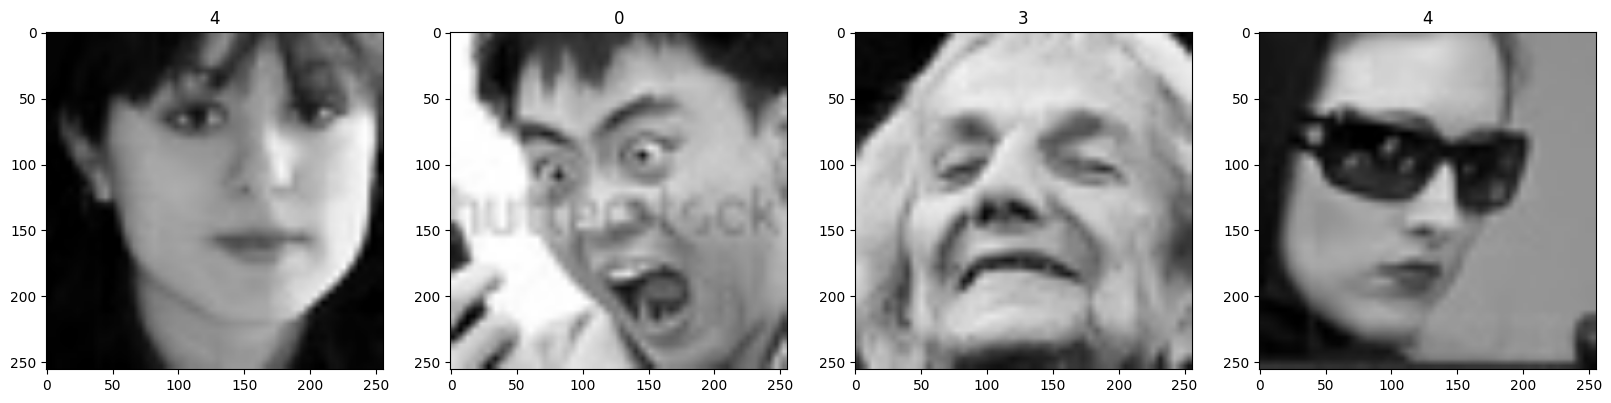

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.1764706 , 0.1764706 , 0.1764706 ],
          [0.1764706 , 0.1764706 , 0.1764706 ],
          [0.1764706 , 0.1764706 , 0.1764706 ],
          ...,
          [0.24705882, 0.24705882, 0.24705882],
          [0.24705882, 0.24705882, 0.24705882],
          [0.24705882, 0.24705882, 0.24705882]],
 
         [[0.1764706 , 0.1764706 , 0.1764706 ],
          [0.1764706 , 0.1764706 , 0.1764706 ],
          [0.1764706 , 0.1764706 , 0.1764706 ],
          ...,
          [0.24705882, 0.24705882, 0.24705882],
          [0.24705882, 0.24705882, 0.24705882],
          [0.24705882, 0.24705882, 0.24705882]],
 
         [[0.1764706 , 0.1764706 , 0.1764706 ],
          [0.1764706 , 0.1764706 , 0.1764706 ],
          [0.1764706 , 0.1764706 , 0.1764706 ],
          ...,
          [0.24705882, 0.24705882, 0.24705882],
          [0.24705882, 0.24705882, 0.24705882],
          [0.24705882, 0.24705882, 0.24705882]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

# 5. Split Data

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

628

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [18]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
from keras.optimizers import Adam
from keras.optimizers.schedules import ExponentialDecay

initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)


In [22]:
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))


model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(7, activation='softmax'))

In [23]:
model.compile(optimizer = Adam(learning_rate=lr_schedule), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 128)       0         
 g2D)                                                   

# 7. Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:

hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

# 8. Plot Performance

In [25]:
model.load_weights("model_weights_epoch_10.h5")

# 9. Evaluate

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [43]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    yhat= np.argmax(yhat, axis=1)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    

1/1 [==============================] - 3s 3s/step


In [44]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9882923, shape=(), dtype=float32) tf.Tensor(0.9979617, shape=(), dtype=float32) tf.Tensor(0.14150281, shape=(), dtype=float32)


# 10. Test

In [51]:
import cv2
import numpy as np
from keras.models import model_from_json

# Load the face detector
face_detector = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

# Load the emotion model
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)
emotion_model.load_weights("model_weights_epoch_10.h5")
print("Loaded emotion model from disk")

# Define the predict_img function
def predict_img(frame):
    # Resize the image
    frame = cv2.resize(frame, (1280, 720))
    num_faces = face_detector.detectMultiScale(frame, scaleFactor=1.3, minNeighbors=5)

    # Draw bounding boxes and annotate the image
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = frame[y:y + h, x:x + w]

        # Preprocess the input image
        resized_img = cv2.resize(roi_gray_frame, (256, 256))
        color_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
        input_img = np.expand_dims(color_img, axis=0)

        # Predict the emotions
        emotion_prediction = emotion_model.predict(input_img)
        maxindex = int(np.argmax(emotion_prediction))
        emotion_label = emotion_dict[maxindex]

        # Annotate the image with emotion label
        cv2.putText(frame, emotion_label, (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    return frame

# Capture video from webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    annotated_frame = predict_img(frame)
    cv2.imshow('Emotion Detection', annotated_frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Loaded emotion model from disk
1/1 [==============================] - 0s 95ms/step
